<a href="https://colab.research.google.com/github/ElenilsonSilva/Banco-de-Dados-Let-s-Car/blob/main/EDA_Diamonds_BKP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Context**

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.


**Content**
*   price price in US dollars (\$326--\$18,823)
*   carat weight of the diamond (0.2--5.01)
*   cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
*   color diamond colour, from J (worst) to D (best)
*   clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, *   VS2, VS1, VVS2, VVS1, IF (best))
*   x length in mm (0--10.74)
*   y width in mm (0--58.9)
*   z depth in mm (0--31.8)
*   depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
*   table width of top of diamond relative to widest point (43--95)


Referência:
https://www.kaggle.com/datasets/shivam2503/diamonds

In [ ]:
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

In [ ]:
%matplotlib inline

In [ ]:
# faça a leitura dos dados diamonds_sample.csv com sep=';'
df_diamonds = pd.read_csv("diamonds_sample.csv", sep=";")

# Análise exploratória dos dados

## Verificando dados faltantes e distribuições dos dados

In [ ]:
df_diamonds_copy = df_diamonds.copy()

In [ ]:
#info
df_diamonds_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  10788 non-null  int64  
 1   carat       10788 non-null  float64
 2   cut         10788 non-null  object 
 3   color       10788 non-null  object 
 4   clarity     10788 non-null  object 
 5   depth       10788 non-null  float64
 6   table       10788 non-null  float64
 7   price       10788 non-null  int64  
 8   x           10788 non-null  float64
 9   y           10788 non-null  float64
 10  z           10788 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 927.2+ KB


In [ ]:
#remover a(s) feature(s) desnecessária(s) 'Unnamed: 0'
df_diamonds_copy.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df_diamonds_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    10788 non-null  float64
 1   cut      10788 non-null  object 
 2   color    10788 non-null  object 
 3   clarity  10788 non-null  object 
 4   depth    10788 non-null  float64
 5   table    10788 non-null  float64
 6   price    10788 non-null  int64  
 7   x        10788 non-null  float64
 8   y        10788 non-null  float64
 9   z        10788 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 842.9+ KB


In [ ]:
#distribuição das features value_counts
df_diamonds_copy.value_counts().head(10)

carat  cut        color  clarity  depth  table  price  x     y     z   
0.50   Fair       E      VS2      79.0   73.0   2579   5.21  5.18  4.09    2
0.31   Ideal      H      VVS2     62.4   57.0   625    4.32  4.36  2.71    2
3.01   Fair       I      SI2      65.8   56.0   18242  8.99  8.94  5.90    2
0.36   Ideal      D      SI1      62.7   57.0   851    4.59  4.54  2.86    2
1.21   Premium    H      SI2      61.9   55.0   5218   6.84  6.79  4.22    2
0.33   Ideal      G      VS1      62.1   55.0   854    4.46  4.43  2.76    2
0.32   Ideal      E      VS2      62.1   55.0   702    4.36  4.40  2.72    2
0.20   Ideal      D      VS2      61.5   57.0   367    3.81  3.77  2.33    1
1.00   Very Good  D      VVS2     63.0   59.0   9740   6.35  6.38  4.01    1
                         SI2      62.5   58.0   4661   6.35  6.44  4.00    1
dtype: int64

In [ ]:
# verificando a quantidade de dados não numéricos
a = df_diamonds.dtypes.isna()
a.map(lambda x: 0 if not int(x) else 1)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
b = df_diamonds.dtypes.isnull()
b.map(lambda x: 0 if not int(x) else 0)

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
# verificando a quantidade de dados nulos
df_diamonds.dtypes.isnull()

carat      False
cut        False
color      False
clarity    False
depth      False
table      False
price      False
x          False
y          False
z          False
dtype: bool

In [ ]:
# faça o describe do dataset
df_diamonds_copy.describe()

,carat,depth,table,price,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.799093,61.753309,57.453087,3939.394698,5.736266,5.738028,3.540945
std,0.472710,1.419210,2.212868,3979.678508,1.117723,1.109461,0.693371
min,0.200000,53.200000,49.000000,335.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,956.000000,4.720000,4.730000,2.910000
50%,0.710000,61.800000,57.000000,2444.000000,5.710000,5.720000,3.530000
75%,1.040000,62.500000,59.000000,5277.750000,6.540000,6.540000,4.040000
max,5.010000,79.000000,79.000000,18823.000000,10.740000,10.540000,6.980000


## Transformação de Dados

### LabelEncoder

In [ ]:
# utilize o LabelEncoder do Sklearn
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

Cut

In [ ]:
df_diamonds_copy[['cut', 'color', 'clarity']].head()

,cut,color,clarity
0,Good,G,SI1
1,Very Good,G,SI1
2,Premium,F,SI2
3,Very Good,F,VVS2
4,Ideal,E,VVS2


In [ ]:
# faça a transformação dos dados da coluna cut
le.fit(df_diamonds_copy['cut'])
df_diamonds_copy["cut_le"] = le.transform(df_diamonds_copy['cut'])

In [ ]:
df_diamonds_copy[['cut', 'cut_le']].head()

,cut,cut_le
0,Good,1
1,Very Good,4
2,Premium,3
3,Very Good,4
4,Ideal,2


Clarity

In [ ]:
# faça a instância de um novo objeto LabelEncoder e transforme a coluna clarity
le.fit(df_diamonds_copy['clarity'])
df_diamonds_copy["clarity_le"] = le.transform(df_diamonds_copy['clarity'])

In [ ]:
df_diamonds_copy[['clarity', 'clarity_le']].head()

,clarity,clarity_le
0,SI1,2
1,SI1,2
2,SI2,3
3,VVS2,7
4,VVS2,7


### One-Hot-Encoding

color

In [ ]:
# aplique o one-hot-encoding do Pandas na coluna color
df_diamonds_copy = pd.get_dummies(df_diamonds_copy, columns=['color'])

In [ ]:
# faça a copia do dataframe atual como forma de backup
df_diamonds_cp = df_diamonds_copy.copy()

In [ ]:
# remova as colunas cut e clarity do novo dataframe
df_diamonds_cp.drop(columns=['cut'], inplace=True)
df_diamonds_cp.drop(columns=['clarity'], inplace=True)

In [ ]:
# analise os novos campos do dataframe
df_diamonds_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10788 entries, 0 to 10787
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   carat       10788 non-null  float64
 1   depth       10788 non-null  float64
 2   table       10788 non-null  float64
 3   price       10788 non-null  int64  
 4   x           10788 non-null  float64
 5   y           10788 non-null  float64
 6   z           10788 non-null  float64
 7   cut_le      10788 non-null  int64  
 8   clarity_le  10788 non-null  int64  
 9   color_D     10788 non-null  uint8  
 10  color_E     10788 non-null  uint8  
 11  color_F     10788 non-null  uint8  
 12  color_G     10788 non-null  uint8  
 13  color_H     10788 non-null  uint8  
 14  color_I     10788 non-null  uint8  
 15  color_J     10788 non-null  uint8  
 16  carat_norm  10788 non-null  int64  
dtypes: float64(6), int64(4), uint8(7)
memory usage: 916.7 KB


## Estatística Descritiva

Gráfico de histograma

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  """


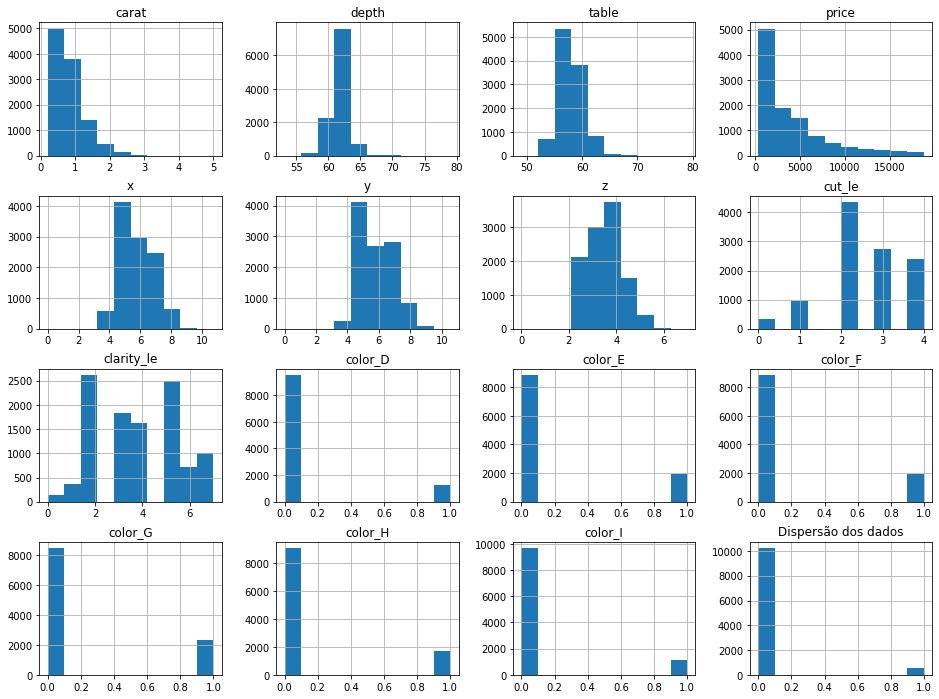

In [ ]:
# faça o plot do gráfico de histograma do dataframe

fig = plt.figure(figsize = (16, 12))
ax = fig.gca()
df_diamonds_cp.hist(ax=ax)
plt.title("Dispersão dos dados")
plt.show()

Mapa de Calor - Correlação

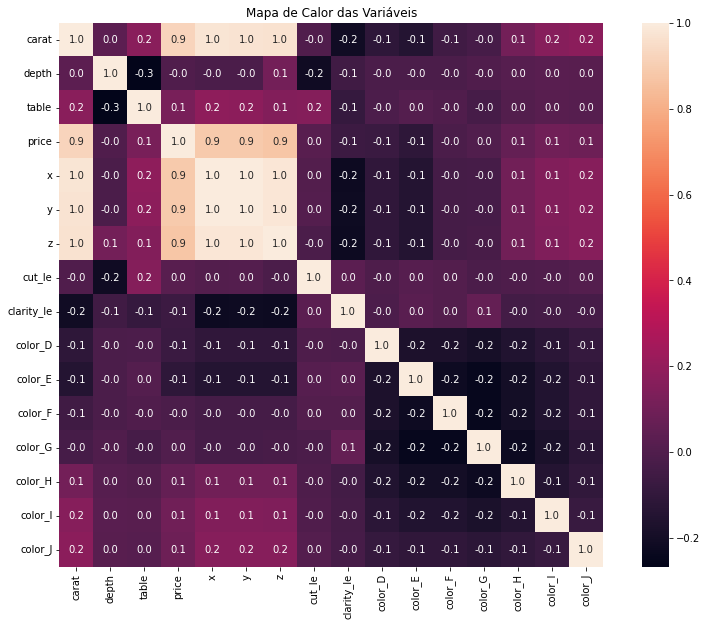

In [ ]:
# faça o plot do gráfico de mapa de calor da correlação dos dados
plt.figure(figsize= (14, 10))
sns.heatmap(df_diamonds_cp.corr(),  fmt='.1f', square = True, linecolor = "white", annot= True)
plt.title("Mapa de Calor das Variáveis")
plt.show()

## Normalização dos dados

StandardScaler

In [ ]:
# import a normalização StandardScaler do sklearn
from sklearn.preprocessing import StandardScaler
# instancie um novo objeto do StandardScaler
scaler = StandardScaler()

In [ ]:
# analise o head do dataframe atual
df_diamonds_cp.head()

,carat,depth,table,price,x,y,z,cut_le,clarity_le,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1.51,63.3,58.0,10085,7.20,7.26,4.58,1,2,0,0,0,1,0,0,0
1,1.04,59.2,61.0,4724,6.63,6.68,3.94,4,2,0,0,0,1,0,0,0
2,0.71,59.6,59.0,2409,5.79,5.75,3.44,3,3,0,0,1,0,0,0,0
3,1.20,62.9,59.0,10891,6.72,6.76,4.24,4,7,0,0,1,0,0,0,0
4,0.50,61.7,55.7,2206,5.09,5.12,3.13,2,7,0,1,0,0,0,0,0


In [ ]:
# aplique a transformação dos dados para as colunas carat, depth, table, x, y e z

In [ ]:
scaled = scaler.fit_transform(df_diamonds_cp[['carat','depth','table', 'x', 'y','z']])

In [ ]:
df_diamonds_cp.head()

,carat,depth,table,price,x,y,z,cut_le,clarity_le,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,1.51,63.3,58.0,10085,7.20,7.26,4.58,1,2,0,0,0,1,0,0,0
1,1.04,59.2,61.0,4724,6.63,6.68,3.94,4,2,0,0,0,1,0,0,0
2,0.71,59.6,59.0,2409,5.79,5.75,3.44,3,3,0,0,1,0,0,0,0
3,1.20,62.9,59.0,10891,6.72,6.76,4.24,4,7,0,0,1,0,0,0,0
4,0.50,61.7,55.7,2206,5.09,5.12,3.13,2,7,0,1,0,0,0,0,0


In [ ]:
df_diamonds_cp[['carat_norm', 'depth_norm', 'table_norm', 'x_norm', 'y_norm', 'z_norm']] = scaled

In [ ]:
# analise o head do dataframe
df_diamonds_cp.head()

,carat,depth,table,price,x,y,z,cut_le,clarity_le,color_D,...,color_G,color_H,color_I,color_J,carat_norm,depth_norm,table_norm,x_norm,y_norm,z_norm
0,1.51,63.3,58.0,10085,7.20,7.26,4.58,1,2,0,...,1,0,0,0,1.503969,1.089876,0.247163,1.309628,1.371876,1.498625
1,1.04,59.2,61.0,4724,6.63,6.68,3.94,4,2,0,...,1,0,0,0,0.509655,-1.799189,1.602932,0.799639,0.849075,0.575555
2,0.71,59.6,59.0,2409,5.79,5.75,3.44,3,3,0,...,0,0,0,0,-0.188481,-1.517329,0.699086,0.048077,0.010791,-0.145593
3,1.20,62.9,59.0,10891,6.72,6.76,4.24,4,7,0,...,0,0,0,0,0.848145,0.808016,0.699086,0.880163,0.921185,1.008244
4,0.50,61.7,55.7,2206,5.09,5.12,3.13,2,7,0,...,0,0,0,0,-0.632749,-0.037564,-0.792260,-0.578225,-0.557079,-0.592705


In [ ]:
# faça a remoção das colunas que não serão utilizadas na modelagem carat, depth, table, x, y e z
df_diamonds_cp.drop(['carat', 'depth', 'table','x', 'y', 'z'], axis=1, inplace=True)

In [ ]:
df_diamonds_cp.head()

,price,cut_le,clarity_le,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat_norm,depth_norm,table_norm,x_norm,y_norm,z_norm
0,10085,1,2,0,0,0,1,0,0,0,1.503969,1.089876,0.247163,1.309628,1.371876,1.498625
1,4724,4,2,0,0,0,1,0,0,0,0.509655,-1.799189,1.602932,0.799639,0.849075,0.575555
2,2409,3,3,0,0,1,0,0,0,0,-0.188481,-1.517329,0.699086,0.048077,0.010791,-0.145593
3,10891,4,7,0,0,1,0,0,0,0,0.848145,0.808016,0.699086,0.880163,0.921185,1.008244
4,2206,2,7,0,1,0,0,0,0,0,-0.632749,-0.037564,-0.792260,-0.578225,-0.557079,-0.592705


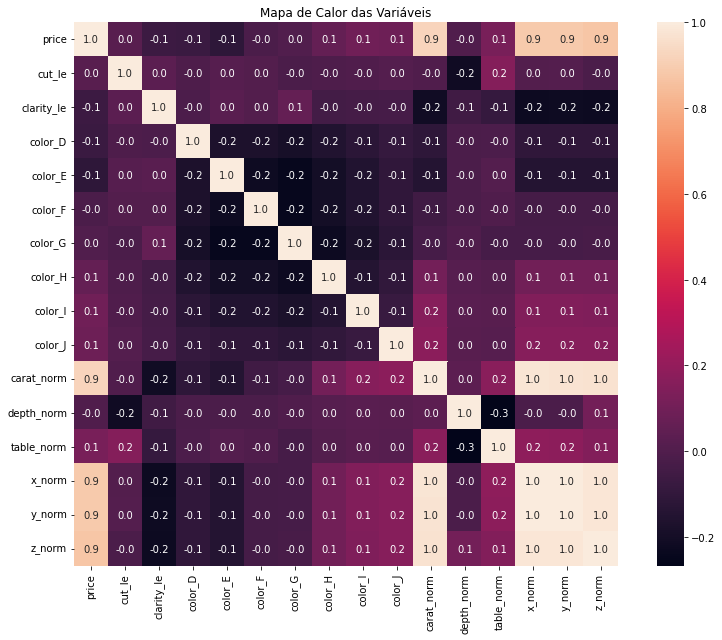

In [ ]:
# faça o plot da correlação dos dados através do mapa de calor

plt.figure(figsize= (14, 10))
sns.heatmap(df_diamonds_cp.corr(),  fmt='.1f', square = True, linecolor = "white", annot= True)
plt.title("Mapa de Calor das Variáveis")
plt.show()

## Separação dos Dados

Holdout

In [ ]:
# import a biblioteca do Sklearn para fazer o treino e teste train_test_split
from sklearn.model_selection import train_test_split

In [ ]:

# faça a separação dos dados em treino e teste
X = df_diamonds_cp.drop( columns=['price'])
y = df_diamonds_cp.price
train_test_split(X, y, test_size=0.25)

In [ ]:
# analise o conjunto X
X

,cut_le,clarity_le,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat_norm,depth_norm,table_norm,x_norm,y_norm,z_norm
0,1,2,0,0,0,1,0,0,0,1.503969,1.089876,0.247163,1.309628,1.371876,1.498625
1,4,2,0,0,0,1,0,0,0,0.509655,-1.799189,1.602932,0.799639,0.849075,0.575555
2,3,3,0,0,1,0,0,0,0,-0.188481,-1.517329,0.699086,0.048077,0.010791,-0.145593
3,4,7,0,0,1,0,0,0,0,0.848145,0.808016,0.699086,0.880163,0.921185,1.008244
4,2,7,0,1,0,0,0,0,0,-0.632749,-0.037564,-0.792260,-0.578225,-0.557079,-0.592705
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10783,2,7,0,1,0,0,0,0,0,-0.886616,0.103366,-1.650914,-0.962954,-0.935659,-0.924433
10784,2,4,0,0,1,0,0,0,0,0.763522,0.103366,-1.560530,0.907005,0.948227,0.936129
10785,1,3,0,0,0,0,0,1,0,0.213476,1.583131,-1.108607,0.334386,0.281205,0.503440
10786,1,4,0,0,0,1,0,0,0,-0.188481,-2.574304,0.699086,0.101760,0.164026,-0.174439


In [ ]:
# analise os dados y
y

0        10085
1         4724
2         2409
3        10891
4         2206
         ...  
10783     1073
10784     9348
10785     2503
10786     2628
10787     2867
Name: price, Length: 10788, dtype: int64